In [31]:

import pandas as pd
import seaborn as sns 
from pandas import DataFrame
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import numpy as np
import plotly
import statistics
import plotly.express as px
import stats
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
import plotly.express as px
import datetime
import datetime as dt
import time
import django.template.backends.jinja2


cmap = sns.diverging_palette(220, 15, as_cmap=True)


# Supress Scientific notation in python
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Display all columns of long dataframe
pd.set_option('display.max_columns', None)

#open file
recovered='recovered_de.csv'
df=pd.read_csv(recovered)
#print(df)



In [32]:
#parse index
df['date']=pd.to_datetime(df['date'], infer_datetime_format=True)
indexeddf=df.set_index(['date'])
#print(indexeddf)

#parsing to time format and extracting dates 
x=df['Date']=pd.to_datetime(df['date'], format='%d-%m-%y')

Day=df['date'].dt.day_name()
Month=df['date'].dt.month_name()
Year=df['date'].dt.year

df['Year']=df['date'].dt.year
df['Month']=df['date'].dt.month_name()
df['Day']=df['date'].dt.day_name()
#print(df)


base_color = sns.color_palette()[0]
state_order = df['state'].value_counts().index
recovered_order=df['recovered'].value_counts().index
month_order=df['Month'].value_counts().index
day_order=df['Day'].value_counts().index
date_order = df['date'].value_counts().index
gender_order = df['gender'].value_counts().index
age_group_order=df['age_group'].value_counts().index

# Indexes for recovered

In [19]:
base_color = sns.color_palette()[0]
state_order = df['state'].value_counts().index
recovered_order=df['recovered'].value_counts().index
month_order=df['Month'].value_counts().index
day_order=df['Day'].value_counts().index
date_order = df['date'].value_counts().index
gender_order = df['gender'].value_counts().index
age_group_order=df['age_group'].value_counts().index

# Recovered states

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]),
 <a list of 9 Text xticklabel objects>)

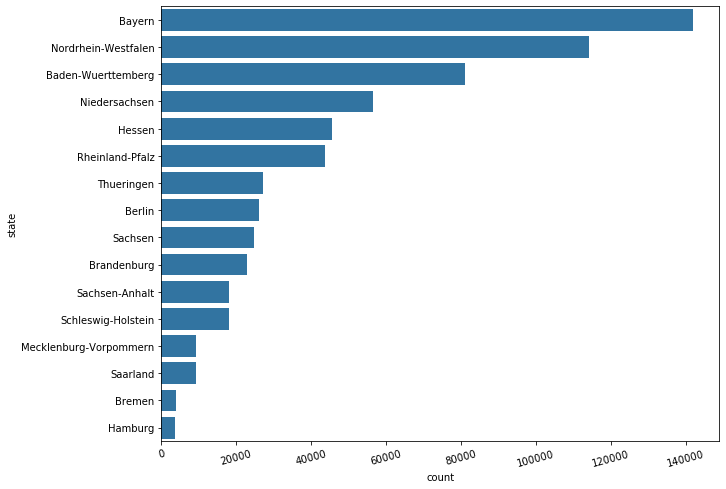

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,y='state',color=base_color,order=state_order)
plt.xticks(rotation=15)

In [35]:
domain_counts = df.groupby(['state', 'Month']).size()
domain_counts = domain_counts.reset_index(name='count')
domain_counts = domain_counts.pivot(index = 'state', columns = 'Month', values = 'count')
domain_counts.head()

Month,April,August,December,February,January,July,June,March,May,November,October,September
state,,,,,,,,,,,,
Baden-Wuerttemberg,6251,2821,12915,7944,10813,1332,742,12394,1828,11495,8441,4161
Bayern,10294,3647,25280,14123,20826,1764,956,20526,2801,22890,13070,5745
Berlin,1546,1057,3733,2629,3391,708,909,3460,698,3597,2878,1369
Brandenburg,1017,255,4443,3002,4466,134,157,3280,247,3472,2110,379
Bremen,208,129,520,477,466,91,145,520,227,526,396,176


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 <a list of 12 Text xticklabel objects>)

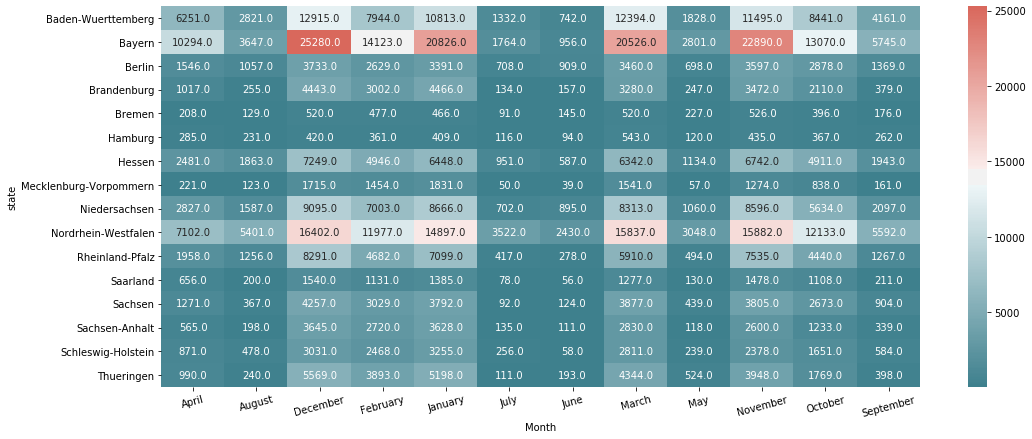

In [88]:
plt.figure(figsize=(17,7))
sns.heatmap(domain_counts, fmt = '.1f',annot = True, cmap = sns.diverging_palette(212,375, as_cmap=True), center = 14000)
plt.xticks(rotation=15)

In [37]:
day_counts = df.groupby(['state', 'Day']).size()
day_counts = day_counts.reset_index(name='count')
day_counts = day_counts.pivot(index = 'state', columns = 'Day', values = 'count')
domain_counts.head()

Month,April,August,December,February,January,July,June,March,May,November,October,September
state,,,,,,,,,,,,
Baden-Wuerttemberg,6251,2821,12915,7944,10813,1332,742,12394,1828,11495,8441,4161
Bayern,10294,3647,25280,14123,20826,1764,956,20526,2801,22890,13070,5745
Berlin,1546,1057,3733,2629,3391,708,909,3460,698,3597,2878,1369
Brandenburg,1017,255,4443,3002,4466,134,157,3280,247,3472,2110,379
Bremen,208,129,520,477,466,91,145,520,227,526,396,176


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text xticklabel objects>)

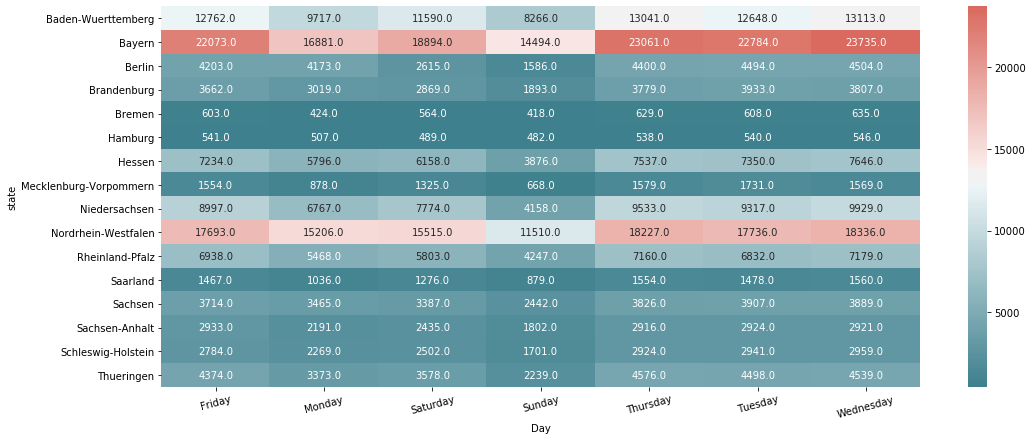

In [38]:
plt.figure(figsize=(17,7))
sns.heatmap(day_counts, fmt = '.1f',annot = True, cmap = sns.diverging_palette(212,375, as_cmap=True), center = 13400)
plt.xticks(rotation=15)

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000., 180000.]),
 <a list of 10 Text xticklabel objects>)

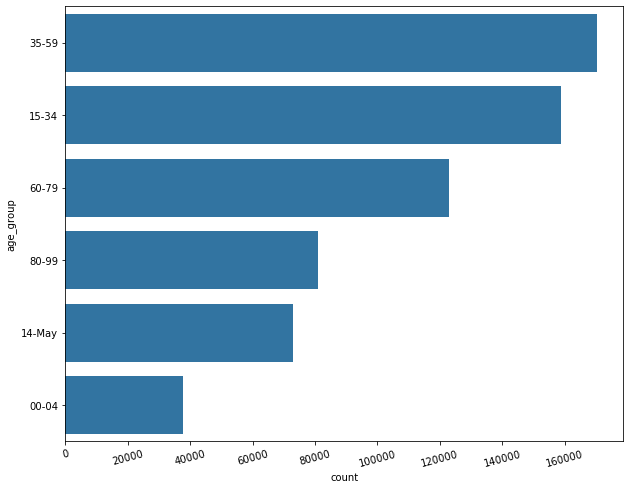

In [39]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,y='age_group',color=base_color,order=age_group_order)
plt.xticks(rotation=15)

In [40]:
age_counts = df.groupby(['age_group', 'Month']).size()
age_counts = age_counts.reset_index(name='count')
age_counts = age_counts.pivot(index = 'age_group', columns = 'Month', values = 'count')
age_counts.head()

Month,April,August,December,February,January,July,June,March,May,November,October,September
age_group,,,,,,,,,,,,
00-04,742,933,7282,4432,5332,593,443,6513,448,6552,3594,1011
14-May,1588,2538,14254,7593,10148,1056,815,10643,734,13395,7577,2666
15-34,9374,7518,23409,17133,21850,3516,2394,22531,3577,21787,16783,8943
35-59,12041,6538,24180,18728,23087,3661,2604,26434,4411,22697,17450,8341
60-79,8571,1807,21068,14274,19601,1223,1014,18636,2413,18760,12101,3488


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 <a list of 12 Text xticklabel objects>)

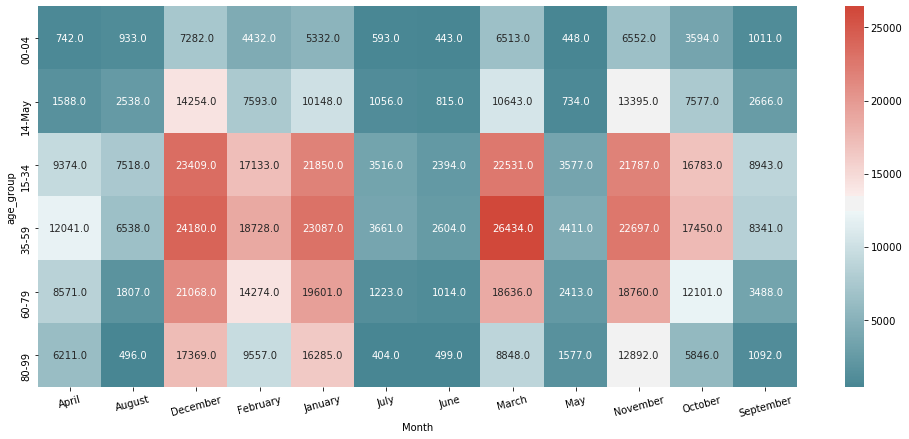

In [41]:
plt.figure(figsize=(17,7))
sns.heatmap(age_counts, fmt = '.1f',annot = True, cmap = sns.diverging_palette(212,375, as_cmap=True), center = 13000)
plt.xticks(rotation=15)

# Year 2020

In [42]:
year2020=df[Year==2020]

In [43]:
age_counts = year2020.groupby(['age_group', 'Month']).size()
age_counts = age_counts.reset_index(name='count')
age_counts = age_counts.pivot(index = 'age_group', columns = 'Month', values = 'count')
age_counts.head()

Month,April,August,December,February,January,July,June,March,May,November,October,September
age_group,,,,,,,,,,,,
00-04,742.00,933.00,7282.00,4.00,1.00,593.00,443.00,447.00,448.00,6552.00,3594.00,1011.00
14-May,1588.00,2538.00,14254.00,3.00,nan,1056.00,815.00,1137.00,734.00,13395.00,7577.00,2666.00
15-34,9374.00,7518.00,23409.00,30.00,5.00,3516.00,2394.00,7388.00,3577.00,21787.00,16783.00,8943.00
35-59,12041.00,6538.00,24180.00,32.00,5.00,3661.00,2604.00,10382.00,4411.00,22697.00,17450.00,8341.00
60-79,8571.00,1807.00,21068.00,13.00,1.00,1223.00,1014.00,6513.00,2413.00,18760.00,12101.00,3488.00


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 <a list of 12 Text xticklabel objects>)

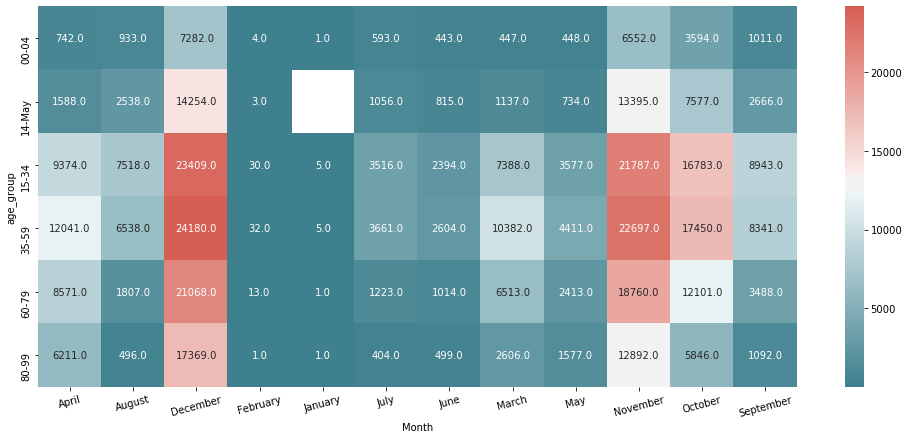

In [44]:
plt.figure(figsize=(17,7))
sns.heatmap(age_counts, fmt = '.1f',annot = True, cmap = sns.diverging_palette(212,375, as_cmap=True), center = 13000)
plt.xticks(rotation=15)

In [45]:
age_counts = year2020.groupby(['age_group', 'Day']).size()
age_counts = age_counts.reset_index(name='count')
age_counts = age_counts.pivot(index = 'age_group', columns = 'Day', values = 'count')
age_counts.head()

Day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
age_group,,,,,,,
00-04,3503,2704,2825,1872,3814,3414,3918
14-May,7380,5556,5897,3975,7859,7089,8007
15-34,16232,14038,13311,9863,17339,16468,17473
35-59,17226,15029,14337,10838,18484,17725,18703
60-79,11692,9877,9883,7323,12916,12250,13031


# Covid per day

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text xticklabel objects>)

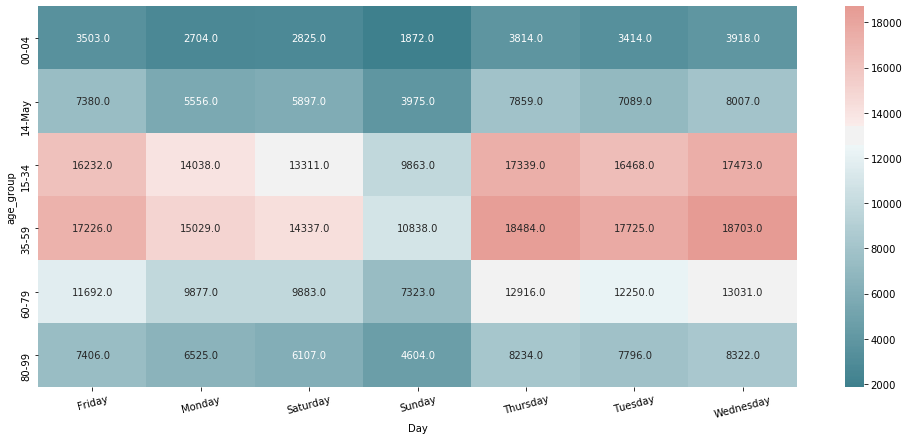

In [46]:
plt.figure(figsize=(17,7))
sns.heatmap(age_counts, fmt = '.1f',annot = True, cmap = sns.diverging_palette(212,375, as_cmap=True), center = 13000)
plt.xticks(rotation=15)

# Multivariate age + state

Text(132.0, 0.5, 'State')

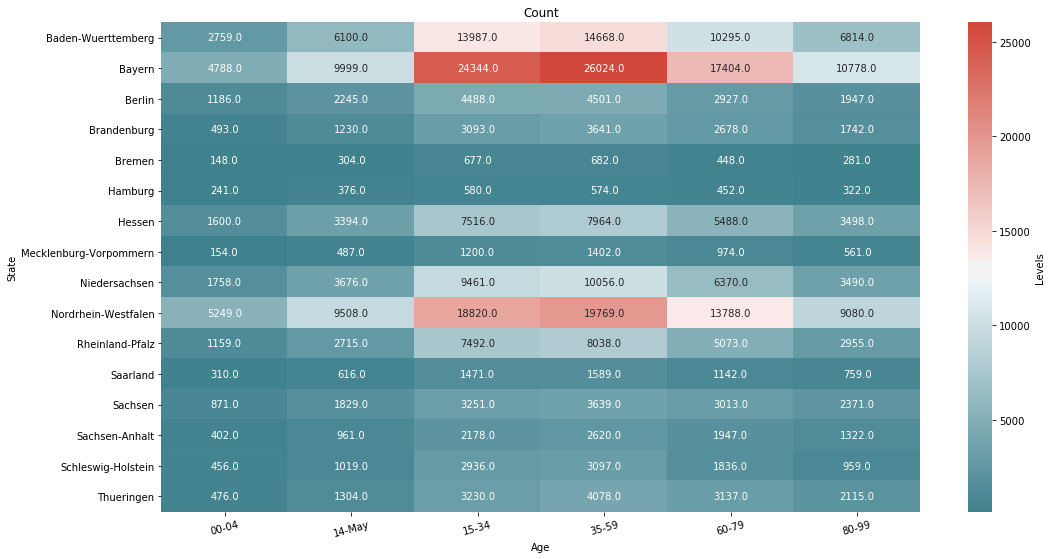

In [47]:
plt.figure(figsize=(17,9))
job_counts = year2020.groupby(['state', 'age_group']).size()
job_counts = job_counts.reset_index(name='count')
job_counts = job_counts.pivot(index = 'state', columns = 'age_group', values = 'count')
sns.heatmap(job_counts, annot = True, cmap = sns.diverging_palette(212,375, as_cmap=True), fmt = '.1f', center = 13000,
           cbar_kws = {'label' : 'Levels'})
plt.xticks(rotation=15)
plt.title('Count')
plt.xlabel('Age')
plt.ylabel('State')

# Multi variate day+month

Text(132.0, 0.5, 'Lev')

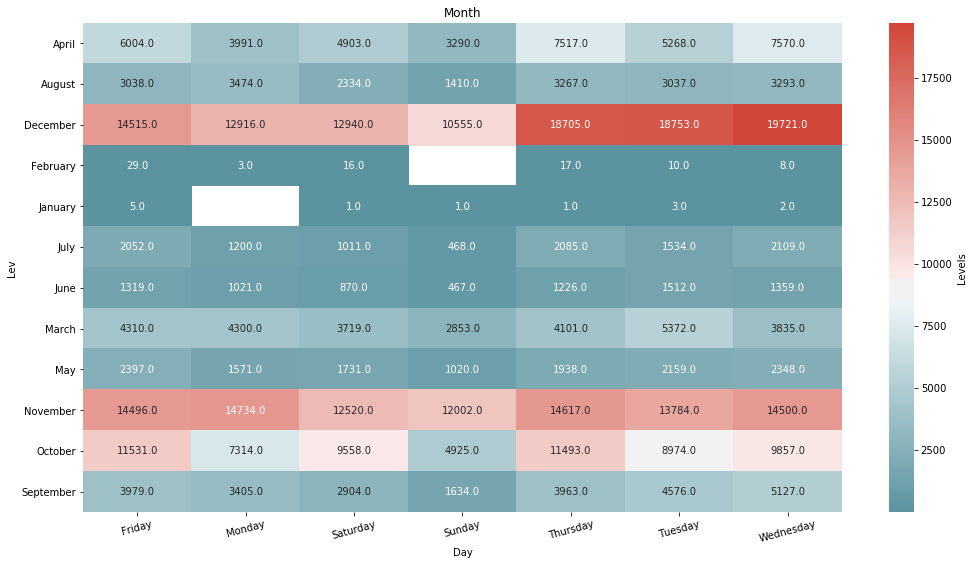

In [51]:
plt.figure(figsize=(17,9))
job_counts = year2020.groupby(['Month', 'Day']).size()
job_counts = job_counts.reset_index(name='count')
job_counts = job_counts.pivot(index = 'Month', columns = 'Day', values = 'count')
sns.heatmap(job_counts, annot = True, cmap = sns.diverging_palette(212,375, as_cmap=True), fmt = '.1f',
           center = 9000,cbar_kws = {'label' : 'Levels'})
plt.xticks(rotation=15)
plt.title('Month')
plt.xlabel('Day')
plt.ylabel('Lev')

# 2021

In [52]:
year=df[Year==2021]

# Covid per  month

In [53]:
month_counts = year.groupby(['state', 'Month']).size()
month_counts = month_counts.reset_index(name='count')
month_counts = month_counts.pivot(index = 'state', columns = 'Month', values = 'count')
month_counts.head()

Month,February,January,March
state,,,
Baden-Wuerttemberg,7925,10813,7567
Bayern,14108,20818,13618
Berlin,2629,3390,2325
Brandenburg,2999,4466,2605
Bremen,477,466,393


(array([0.5, 1.5, 2.5]), <a list of 3 Text xticklabel objects>)

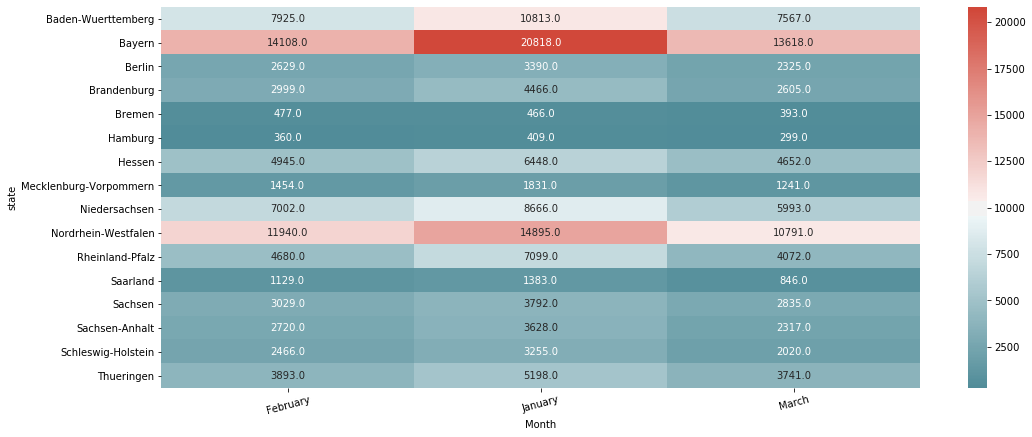

In [55]:
plt.figure(figsize=(17,7))
sns.heatmap(month_counts, fmt = '.1f',annot = True, cmap = sns.diverging_palette(212,375, as_cmap=True), center = 10000)
plt.xticks(rotation=15)

# Covid tracking per Days

In [56]:
yr_counts = year.groupby(['state', 'Day']).size()
yr_counts = yr_counts.reset_index(name='count')
yr_counts = yr_counts.pivot(index = 'state', columns = 'Day', values = 'count')
yr_counts.head()

Day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
state,,,,,,,
Baden-Wuerttemberg,4257,2923,4101,2643,4026,4285,4070
Bayern,7844,4844,7106,5084,7495,8301,7870
Berlin,1447,1397,843,390,1392,1480,1395
Brandenburg,1594,1209,1444,907,1580,1733,1603
Bremen,206,155,200,159,195,211,210


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text xticklabel objects>)

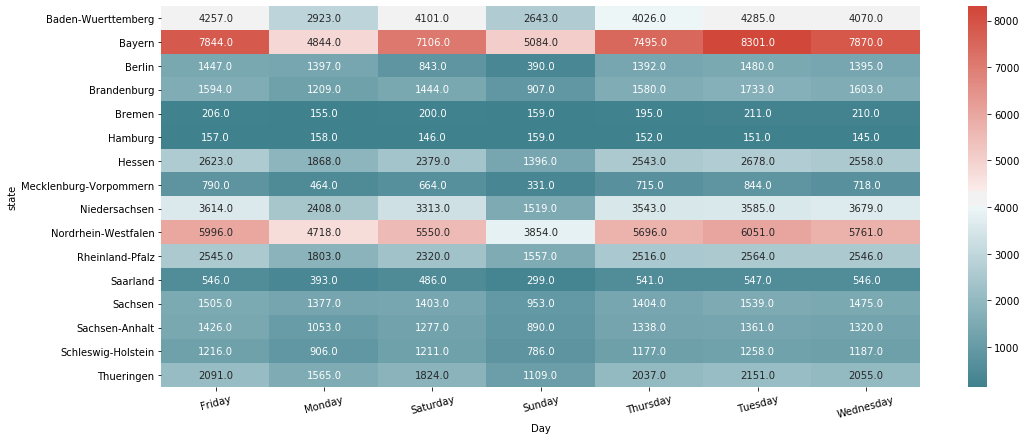

In [59]:
plt.figure(figsize=(17,7))
sns.heatmap(yr_counts, fmt = '.1f',annot = True, cmap = sns.diverging_palette(212,375, as_cmap=True), center =4200)
plt.xticks(rotation=15)

# Covid in age groups per month

In [60]:
age_counts = year.groupby(['age_group', 'Month']).size()
age_counts = age_counts.reset_index(name='count')
age_counts = age_counts.pivot(index = 'age_group', columns = 'Month', values = 'count')
age_counts.head()

Month,February,January,March
age_group,,,
00-04,4428,5331,6066
14-May,7590,10148,9506
15-34,17103,21845,15143
35-59,18696,23082,16052
60-79,14261,19600,12123


(array([0.5, 1.5, 2.5]), <a list of 3 Text xticklabel objects>)

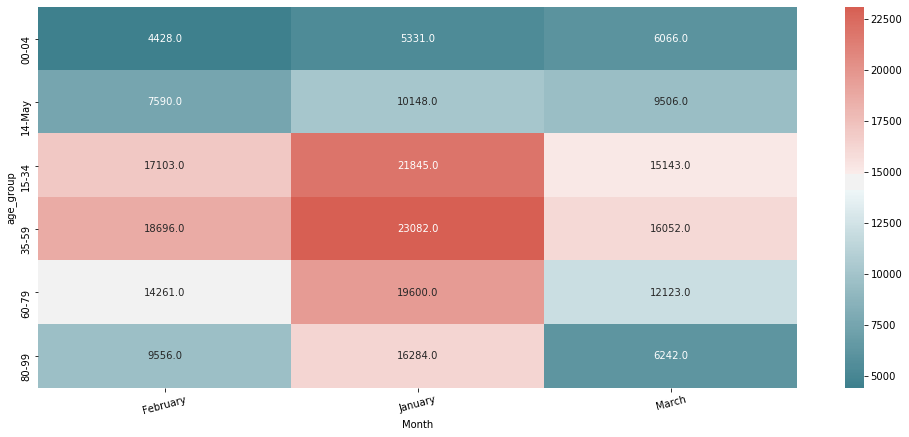

In [65]:
plt.figure(figsize=(17,7))
sns.heatmap(age_counts, fmt = '.1f',annot = True, cmap = sns.diverging_palette(212,375, as_cmap=True), center =14500)
plt.xticks(rotation=15)

# Multivariate - covid on age and state

Text(132.0, 0.5, 'State')

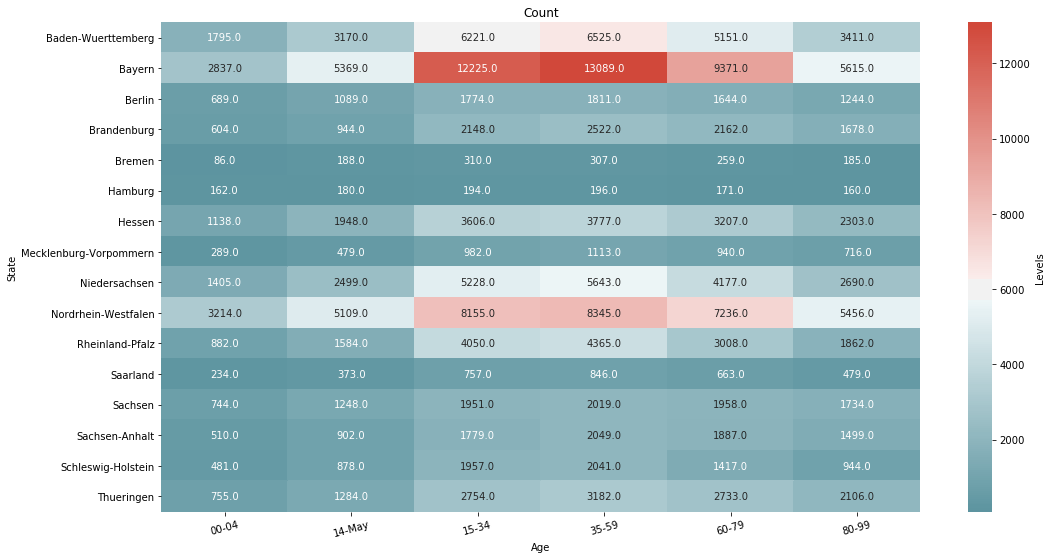

In [66]:
plt.figure(figsize=(17,9))
job_counts = year.groupby(['state', 'age_group']).size()
job_counts = job_counts.reset_index(name='count')
job_counts = job_counts.pivot(index = 'state', columns = 'age_group', values = 'count')
sns.heatmap(job_counts, annot = True, cmap =sns.diverging_palette(212,375, as_cmap=True), fmt = '.1f',
           center = 6000,cbar_kws = {'label' : 'Levels'})
plt.xticks(rotation=15)
plt.title('Count')
plt.xlabel('Age')
plt.ylabel('State')

Text(132.0, 0.5, 'Month')

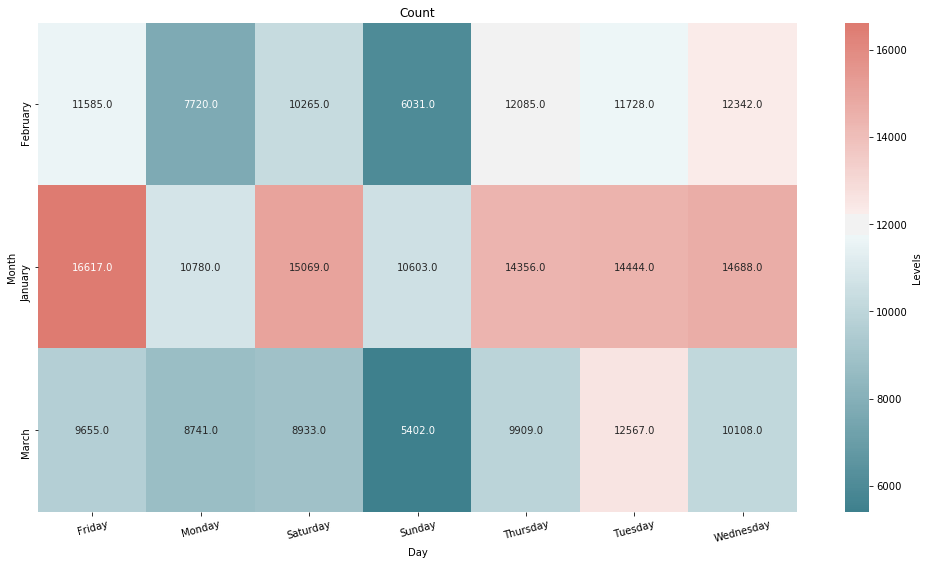

In [70]:
plt.figure(figsize=(17,9))
job_counts = year.groupby(['Month', 'Day']).size()
job_counts = job_counts.reset_index(name='count')
job_counts = job_counts.pivot(index = 'Month', columns = 'Day', values = 'count')
sns.heatmap(job_counts, annot = True, cmap = sns.diverging_palette(212,375, as_cmap=True), fmt = '.1f',
           center = 12000,cbar_kws = {'label' : 'Levels'})
plt.xticks(rotation=15)
plt.title('Count')
plt.xlabel('Day')
plt.ylabel('Month')

In [71]:
#open file
de='cases_de.csv'
cases=pd.read_csv(de)
#print(cases)

In [72]:
#parse index
cases['date']=pd.to_datetime(cases['date'], infer_datetime_format=True)
indexeddf=cases.set_index(['date'])
#print(indexeddf)

#parsing to time format and extracting dates 
y=cases['Date']=pd.to_datetime(cases['date'], format='%d-%m-%y')

Day=cases['date'].dt.day_name()
Month=cases['date'].dt.month_name()
Year=cases['date'].dt.year

cases['Year']=cases['date'].dt.year
cases['Month']=cases['date'].dt.month_name()
cases['Day']=cases['date'].dt.day_name()
#print(cases)

In [73]:
base_color = sns.color_palette()[0]
state_order = cases['state'].value_counts().index
cases_order=cases['cases'].value_counts().index
month_order=cases['Month'].value_counts().index
day_order=cases['Day'].value_counts().index
date_order = cases['date'].value_counts().index
gender_order = cases['gender'].value_counts().index
age_group_order=cases['age_group'].value_counts().index

In [74]:
year2021=cases[cases.Year==2021]

In [75]:
base_color = sns.color_palette()[3]
state_order = year2021['state'].value_counts().index
cases_order=year2021['cases'].value_counts().index
month_order=year2021['Month'].value_counts().index
day_order=year2021['Day'].value_counts().index
date_order = year2021['date'].value_counts().index
gender_order = year2021['gender'].value_counts().index
age_group_order=year2021['age_group'].value_counts().index

In [76]:
year2021

,state,county,age_group,gender,date,cases,Date,Year,Month,Day
23,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2021-01-24,1,2021-01-24,2021,January,Sunday
24,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2021-01-30,3,2021-01-30,2021,January,Saturday
25,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2021-02-06,1,2021-02-06,2021,February,Saturday
26,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2021-02-12,1,2021-02-12,2021,February,Friday
27,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2021-02-18,1,2021-02-18,2021,February,Thursday
...,...,...,...,...,...,...,...,...,...,...
646000,Thueringen,SK Weimar,80-99,M,2021-02-12,1,2021-02-12,2021,February,Friday
646001,Thueringen,SK Weimar,80-99,M,2021-02-24,1,2021-02-24,2021,February,Wednesday
646002,Thueringen,SK Weimar,80-99,M,2021-03-03,1,2021-03-03,2021,March,Wednesday
646003,Thueringen,SK Weimar,80-99,M,2021-03-14,1,2021-03-14,2021,March,Sunday


Text(132.0, 0.5, 'Day')

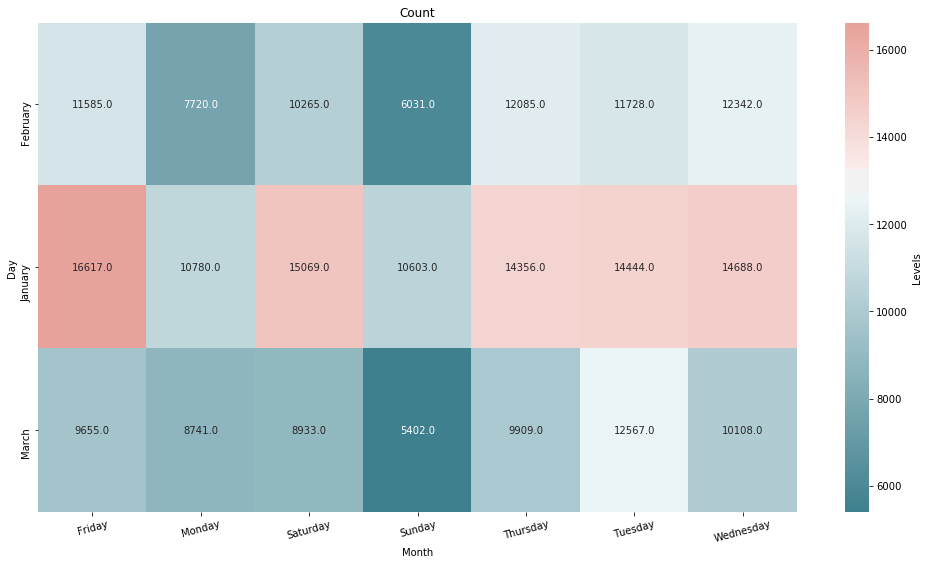

In [80]:
plt.figure(figsize=(17,9))
job_counts = year2021.groupby(['Month', 'Day']).size()
job_counts = job_counts.reset_index(name='count')
job_counts = job_counts.pivot(index = 'Month', columns = 'Day', values = 'count')
sns.heatmap(job_counts, annot = True, cmap = sns.diverging_palette(212,375, as_cmap=True), fmt = '.1f',
           center = 13000,cbar_kws = {'label' : 'Levels'})
plt.xticks(rotation=15)
plt.title('Count')
plt.xlabel('Month')
plt.ylabel('Day')

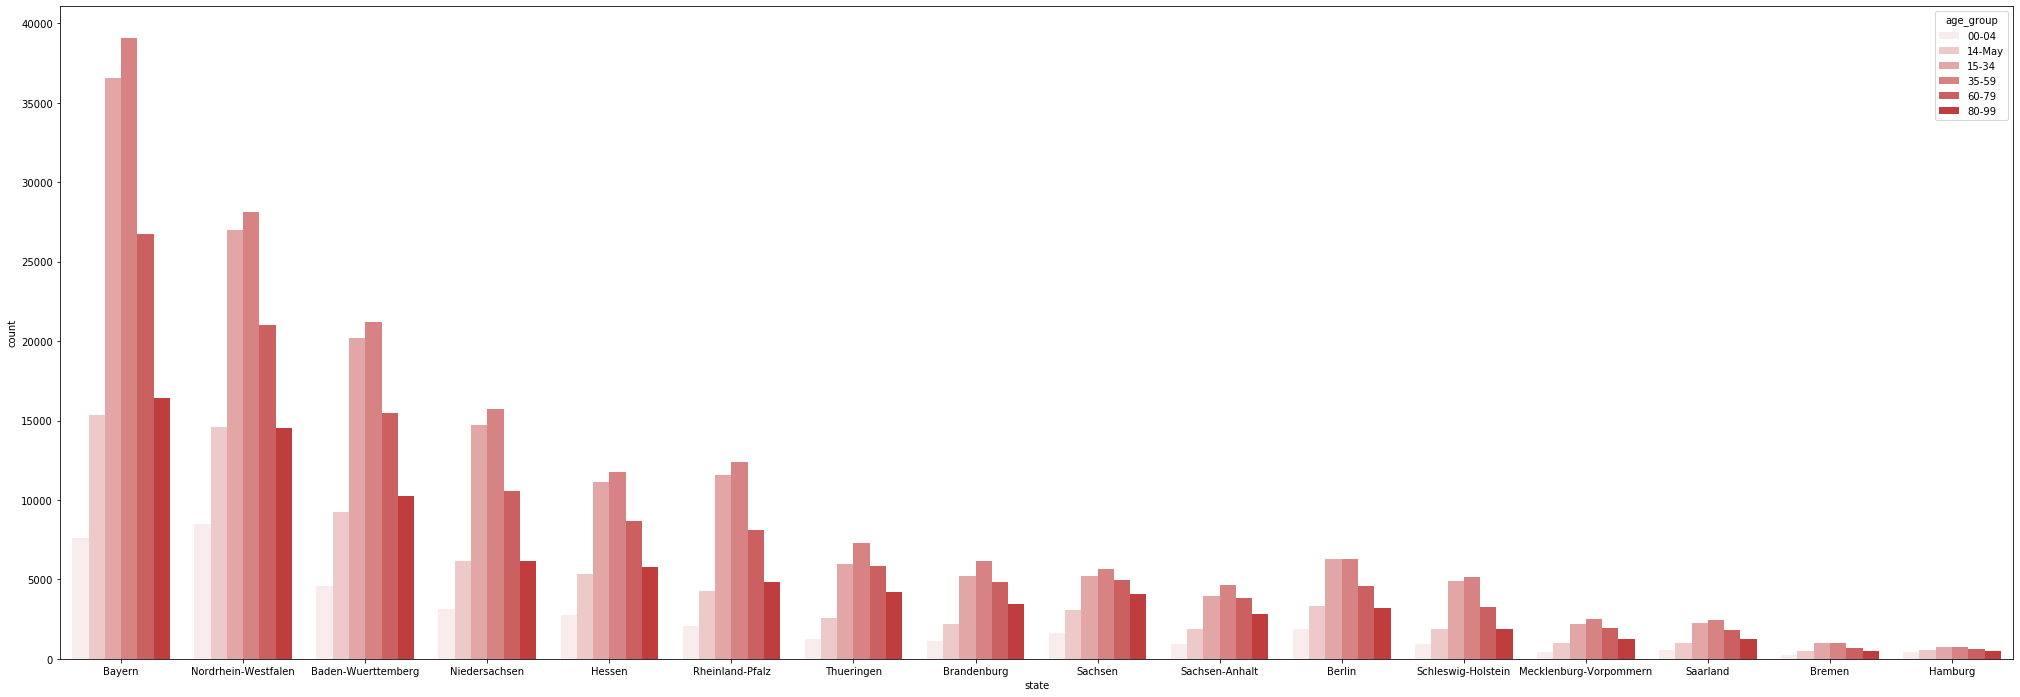

In [78]:
plt.figure(figsize=(35,12))
sns.countplot(data = cases, x = 'state', hue = 'age_group',color=base_color,order=state_order)

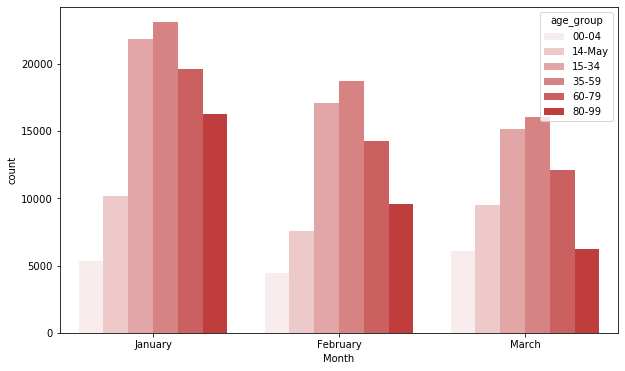

In [79]:
plt.figure(figsize=(10,6))
sns.countplot(data = year2021, x = 'Month', hue = 'age_group',color=base_color,order=month_order)